(8000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB
Clayey    1623
Black     1613
Red       1594
Loamy     1590
Sandy     1580
Name: Soil Type, dtype: int64
Sugarcane      763
Maize          753
Wheat          747
Ground Nuts    732
Pulses         728
Cotton         722
Millets        718
Tobacco        717
Oil seeds      711
Paddy          706
Name: Crop Type, dt

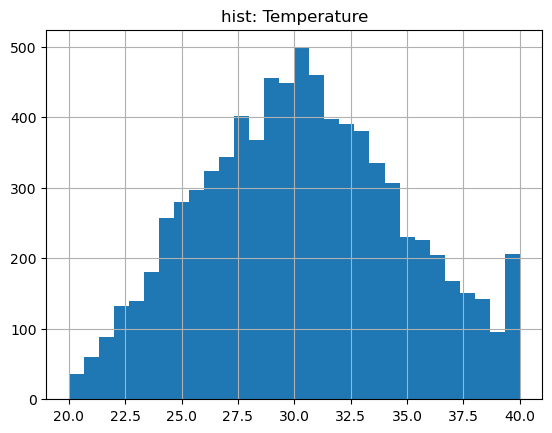

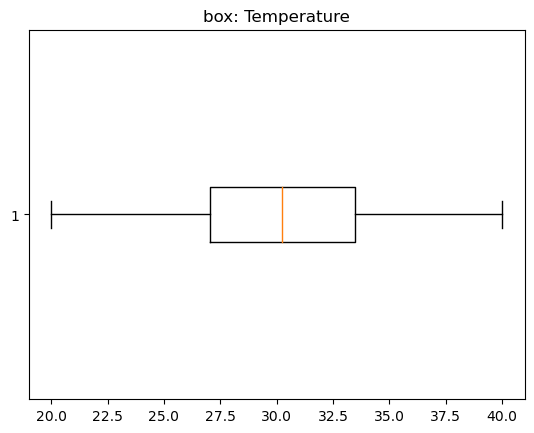

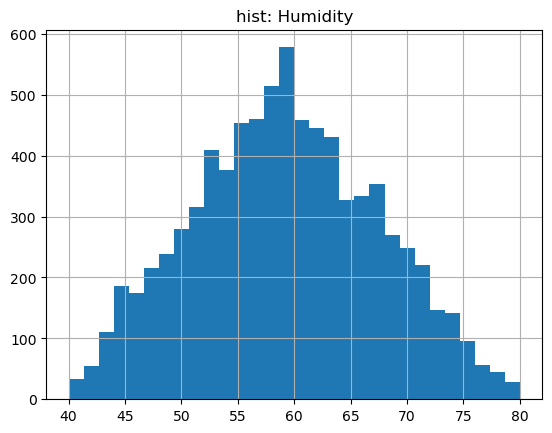

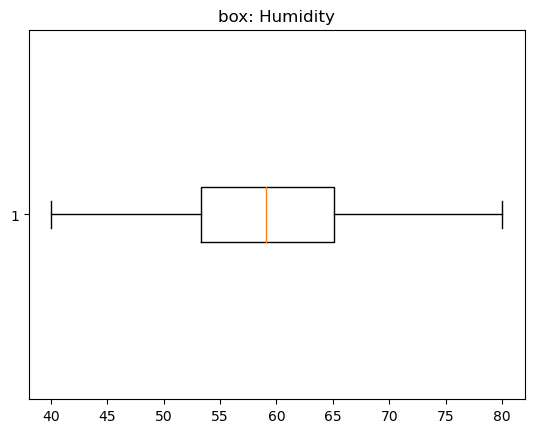

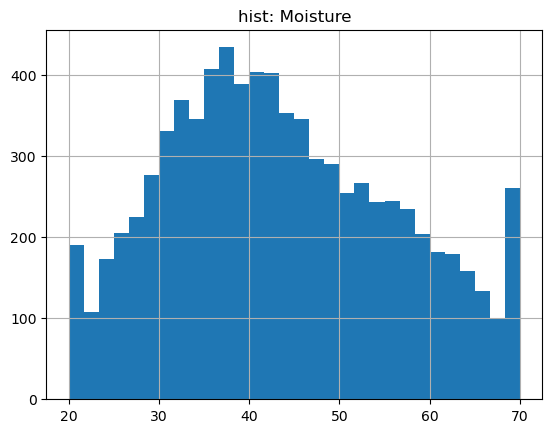

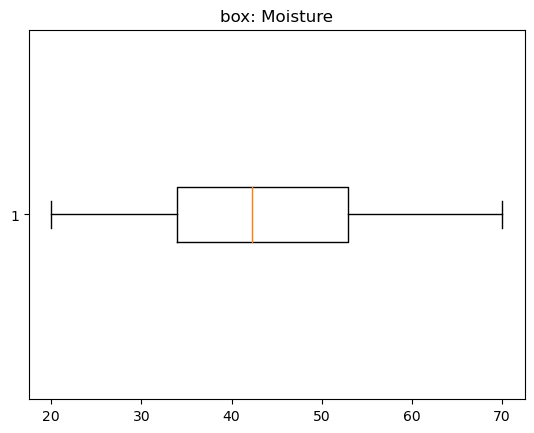

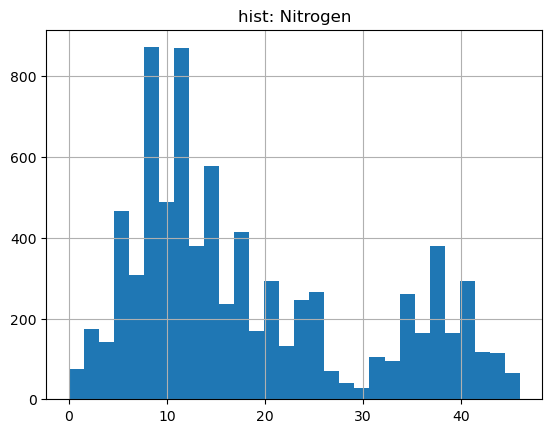

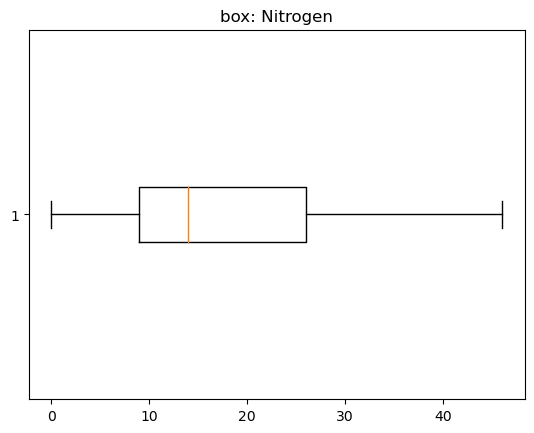

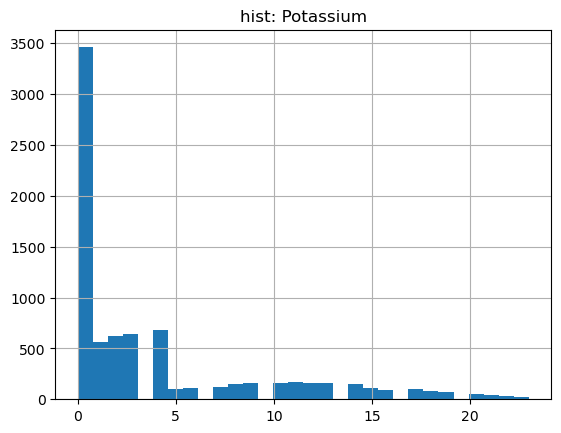

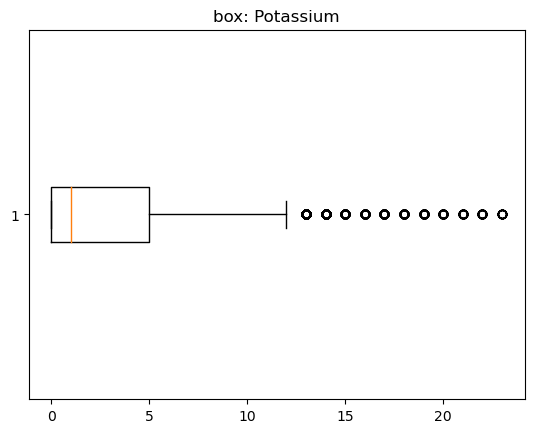

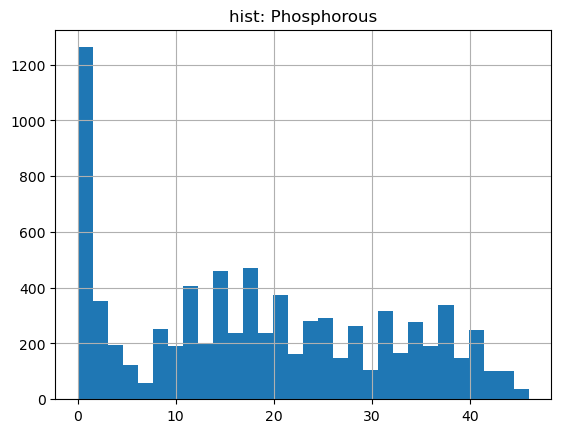

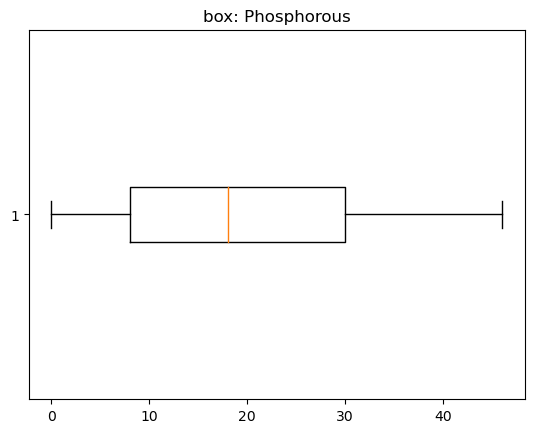

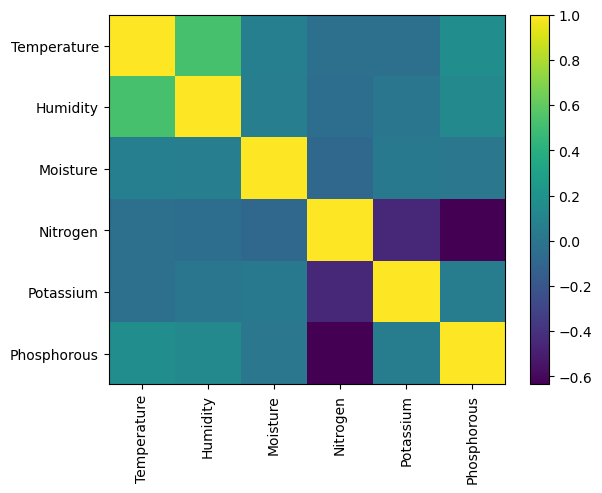

In [2]:
import pandas as pd
import numpy as np
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df = pd.read_csv(r"C:\Users\prath\OneDrive\Desktop\Snaagain\data\data_core.csv");

# A) basic peek
print(df.shape); df.head()
df.info()                     
df.sample(5, random_state=42)  

# B) hygiene checks
df.isna().sum().sort_values(ascending=False)  # missing values
df.duplicated().sum()                         # duplicate rows

# C) numeric summary
num = df.select_dtypes(include=[np.number])
num.describe().T               # mean/std/percentiles
num.agg(['min','max']).T       # hard bounds
num.skew()                     # skewness (heavy tails?)

# D) categorical overview
cat = [c for c in df.columns if c not in num.columns]
{c: df[c].nunique() for c in cat}             # unique counts
for c in cat: print(df[c].value_counts().head(10))

# E) distributions & outliers
for c in num.columns:
    df[c].hist(bins=30); plt.title(f"hist: {c}"); plt.show()
    plt.boxplot(df[c].dropna(), vert=False); plt.title(f"box: {c}"); plt.show()

# F) relationships
corr = num.corr()              # Pearson
corr
plt.imshow(corr, aspect="auto"); plt.colorbar(); plt.xticks(range(len(corr)), corr.columns, rotation=90); plt.yticks(range(len(corr)), corr.index); plt.show()

# Focus on targets
targets = [t for t in ["Nitrogen","Phosphorous","Potassium"] if t in df.columns]
corr[targets].sort_values(by=targets, ascending=False)

# quick diagnostics
(df["Potassium"]==0).mean() if "Potassium"in df else None  # zero-inflation check
(df["Phosphorous"]==0).mean() if "Phosphoruos" in df else None


In [3]:
# D) categorical overview
cat = [c for c in df.columns if c not in num.columns]
{c: df[c].nunique() for c in cat}             # unique counts
for c in cat: print(df[c].value_counts().head(10))

Clayey    1623
Black     1613
Red       1594
Loamy     1590
Sandy     1580
Name: Soil Type, dtype: int64
Sugarcane      763
Maize          753
Wheat          747
Ground Nuts    732
Pulses         728
Cotton         722
Millets        718
Tobacco        717
Oil seeds      711
Paddy          706
Name: Crop Type, dtype: int64
14-35-14    1188
Urea        1170
DAP         1167
10-26-26    1128
17-17-17    1124
28-28       1120
20-20       1103
Name: Fertilizer Name, dtype: int64


In [4]:
num = df.select_dtypes(include=[np.number])
num.describe().T               # mean/std/percentiles
num.agg(['min','max']).T       # hard bounds
num.skew()                     # skewness (heavy tails?)

Temperature    0.101795
Humidity       0.056432
Moisture       0.256751
Nitrogen       0.749592
Potassium      1.516980
Phosphorous    0.161363
dtype: float64

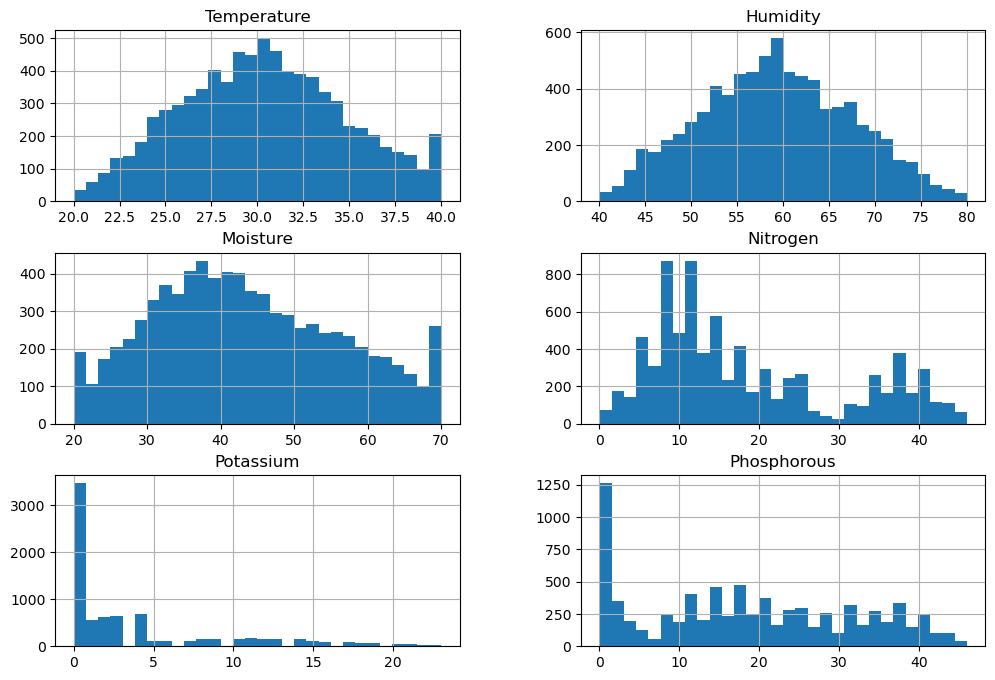

In [5]:
import matplotlib.pyplot as plt
num.hist(figsize=(12,8), bins=30)
plt.show()


In [6]:
num.agg(['min','max']).T

,min,max
Temperature,20.00,40.0
Humidity,40.02,80.0
Moisture,20.00,70.0
Nitrogen,0.00,46.0
Potassium,0.00,23.0
Phosphorous,0.00,46.0


In [9]:
df.corr()


,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temperature,1.000000,0.525594,0.067963,-0.028978,-0.031322,0.166951
Humidity,0.525594,1.000000,0.066713,-0.042701,0.005695,0.136216
Moisture,0.067963,0.066713,1.000000,-0.085016,0.023618,0.011854
Nitrogen,-0.028978,-0.042701,-0.085016,1.000000,-0.445762,-0.635694
Potassium,-0.031322,0.005695,0.023618,-0.445762,1.000000,0.056225
Phosphorous,0.166951,0.136216,0.011854,-0.635694,0.056225,1.000000


C:\Users\prath\anaconda3\python.exe
